In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL 
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

import pathlib

print("Plugins Successful!")

Plugins Successful!


In [2]:
batch_size = 32
img_height = 48
img_width = 48

In [3]:
train_path = r"C:\Users\Julio\Documents\GitHub\JulioClaros321.github.io\Professional_Projects\Python\ML Emotion Recognition\train"
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)


Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=.2,
    subset = "validation", 
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [5]:
class_names = train_dataset.class_names
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

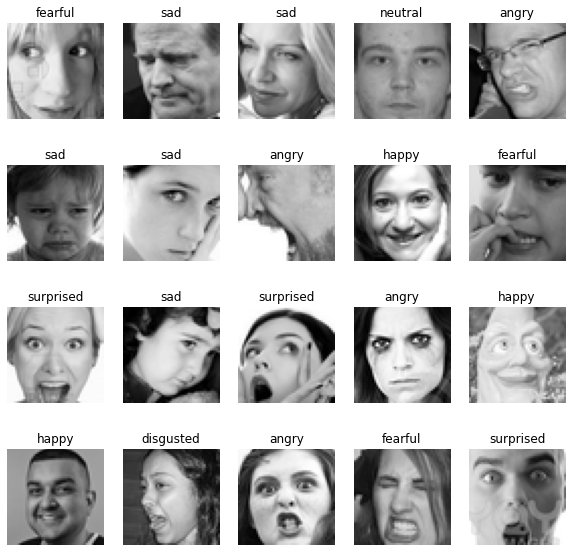

In [6]:
plt.figure(figsize = (10,10))
for images, labels in train_dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 3)
(32,)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./225)

normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))


0.0 0.98222226


In [37]:
num_class = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(.1),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(.1),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(.1),
    layers.Flatten(), 
    layers.Dense(128, activation="relu"),
    layers.Dense(num_class)
])

In [38]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 48, 48, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                 

In [40]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 15)

Epoch 1/15
718/718 [==============================] - 29s 40ms/step - loss: 1.6660 - accuracy: 0.3332 - val_loss: 1.5095 - val_accuracy: 0.4144
Epoch 2/15
718/718 [==============================] - 28s 39ms/step - loss: 1.4438 - accuracy: 0.4465 - val_loss: 1.3823 - val_accuracy: 0.4738
Epoch 3/15
718/718 [==============================] - 28s 39ms/step - loss: 1.3341 - accuracy: 0.4891 - val_loss: 1.3284 - val_accuracy: 0.4872
Epoch 4/15
718/718 [==============================] - 28s 39ms/step - loss: 1.2500 - accuracy: 0.5232 - val_loss: 1.2731 - val_accuracy: 0.5102
Epoch 5/15
718/718 [==============================] - 28s 39ms/step - loss: 1.1843 - accuracy: 0.5521 - val_loss: 1.2718 - val_accuracy: 0.5177
Epoch 6/15
718/718 [==============================] - 28s 39ms/step - loss: 1.1327 - accuracy: 0.5724 - val_loss: 1.2397 - val_accuracy: 0.5314
Epoch 7/15
718/718 [==============================] - 30s 42ms/step - loss: 1.0767 - accuracy: 0.5931 - val_loss: 1.2475 - val_accuracy:

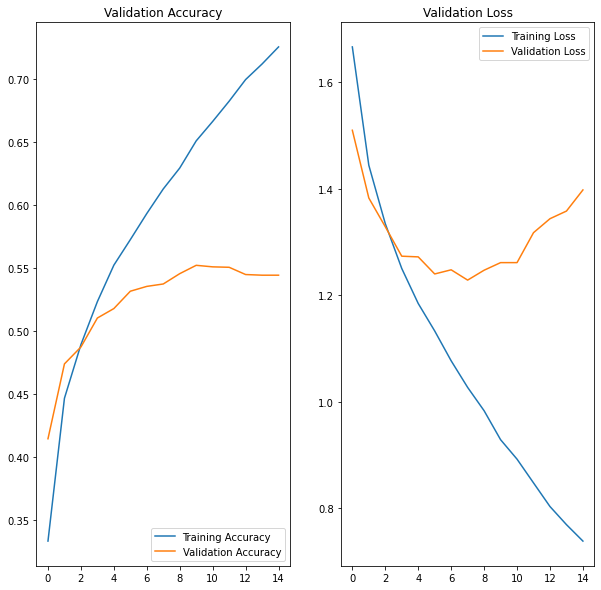

In [42]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"] 
val_loss = history.history["val_loss"]

epochs_range = range(15)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()